In [60]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets
import copy

# Backpropagation Algorithm From Scratch

The idea is to implement the **Back Propagation** algorithm to train Feed Forward Neural Networks. 

We will implement the algorithm from scratch in Python, and we will only use built-in libraries and numpy, avoiding for the moment the usage of higher-level frameworks (Pytorch or Tensorflow).

This excersice will help me remeber the foundations of Deep Learning.


## Background

### Loss Function

The **Loss Function** for the moment is the $l_2$ norm of the difference between the predicted and true labels ($\hat y$ and $y$, respecitvely).

$$
L(y, \hat y) = \dfrac{1}{2}\|y-\hat y \|^2
$$


In [35]:
def loss(y_true, y_pred):
    N_points = y_true.shape[0]
    return (1.0/(2.0*N_points))*np.linalg.norm(y_true-y_pred)

#### Feed Forward Model

The **Feed Forward** model considers the consecutive application of linear transformations and activation functions. Given an input $x$, the model's output is given by:

$$
g(x) = f_K(f_{K-1}(\cdots f_2(f_1(x))))
$$

where:
$$
\\
f_0 = x,  \\
f_i = \sigma(A_{i-1}f_{i-1}+b_{i-1})
$$


For simplicity, we consider the activation functions to be the sigmoid function:

$$
\sigma (x) = \dfrac{1}{1+e^{-x}},  \\
\sigma ' (x) = \sigma (x) (1-\sigma (x))
$$


In [36]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1.0-sigmoid(x))





### Learning using Gradient Descent


Notice that the model $g(x)$ depends on the parameters $\{A_0, b_0, \cdots, A_{K-1}, b_{K-1}\}$ that represent the weights ($A_i$) and the biases ($b_i$) of the model. Such parameters are optimized using a Gradient Descent algorithm, which updates the values of the parameters iteratively by following the rule:


$$
A_i \leftarrow A_i - \alpha \dfrac{\partial L}{\partial A_i} \\
b_i \leftarrow b_i - \alpha \dfrac{\partial L}{\partial b_i}
$$

where $\alpha$ is the learning rate.


Hence, the question is: How do we estimate $\dfrac{\partial L}{\partial A_i}$? The answer is the Backpropagation algorithm, which in turn is based on a reverse application of the Chain Rule for diferentiation.

### Chain Rule


Consider the model for $g(x)$ by using the following auxiliary variables:

$$
h_i = A_{i-1}f_{i-1}+b_{i-1} \\
f_i = \sigma (h_i)
$$

where the boundary conditions is $f_0 = x$.

The Chain Rule states:

$$
\dfrac{\partial L}{\partial A_{K-1}} = \dfrac{\partial L}{\partial f_K} \dfrac{\partial f_K}{\partial h_K} \dfrac{\partial h_K}{\partial A_{K-1}} \\
\dfrac{\partial L}{\partial A_{K-2}} = \dfrac{\partial L}{\partial f_K} (\dfrac{\partial f_K}{\partial h_K} \dfrac{\partial h_K}{\partial f_{K-1}} ) (\dfrac{\partial f_{K-1}}{\partial h_{K-1}} \dfrac{\partial h_{K-1}}{\partial A_{K-2}} )\\
\dfrac{\partial L}{\partial A_{K-3}} = \dfrac{\partial L}{\partial f_K} (\dfrac{\partial f_K}{\partial h_K} \dfrac{\partial h_K}{\partial f_{K-1}} ) (\dfrac{\partial f_{K-1}}{\partial h_{K-1}} \dfrac{\partial h_{K-1}}{\partial f_{K-2}} ) (\dfrac{\partial f_{K-2}}{\partial h_{K-2}} \dfrac{\partial h_{K-2}}{\partial A_{K-3}} )\\
\dfrac{\partial L}{\partial A_{i}} = \dfrac{\partial L}{\partial f_K} (\dfrac{\partial f_K}{\partial h_K} \dfrac{\partial h_K}{\partial f_{K-1}} ) (\dfrac{\partial f_{K-1}}{\partial h_{K-1}} \dfrac{\partial h_{K-1}}{\partial f_{K-2}} )\cdots(\dfrac{\partial f_{i+2}}{\partial h_{i+1}} \dfrac{\partial h_{i+1}}{\partial f_{i+1} }) (\dfrac{\partial f_{i+1}}{\partial h_{i+1}} \dfrac{\partial h_{i+1}}{\partial A_{i} })\\
$$


Some of the terms are:

$$
\dfrac{\partial L}{\partial f_K}  = \dfrac{\partial }{\partial f_K} \| y-f_K\|^2 = -2 (y-f_k)I \\
\dfrac{\partial f_i}{\partial h_i} = \sigma (h_i) (1-\sigma (h_i)) \\
\dfrac{\partial h_i}{\partial f_{i-1}} = A_{i-1} \\
\dfrac{\partial h_i}{\partial A_{i-1}} = f_i \otimes I
$$


## Toy Model - 2 hidden layers

In a 2 hidden layer model, the computational graph will be as follows:

$$
\begin{array}{rcl}
 x & \rightarrow & z_1 =w_1x+b_1 \\
     & \rightarrow & h_1 = \sigma (z_1) \\
     & \rightarrow & z_2 = w_2 h_1+ b_2 \\
     & \rightarrow & h_2 = \sigma (z_2)
\end{array}
$$




In [48]:
X, y = sklearn.datasets.load_boston(return_X_y=True)

input_dim = X.shape[1]
hidden_dim = 10

In [49]:
weights = {
    'W1' : np.random.rand(hidden_dim, input_dim),
    'W2' : np.random.rand(hidden_dim),
    'b1' : np.random.rand(hidden_dim),
    'b2' : np.random.rand()
}

In [50]:
def forward_prop(X, weights):
    z1 = np.dot(X, weights['W1'].T)+weights['b1']
    h1 = sigmoid(z1)
    z2 = np.dot(h1, weights['W2'].T)+weights['b2']
    h2 = sigmoid(z2)
    return z1, h1, z2, h2

In [51]:
z1, h1, z2, h2 = forward_prop(X, weights)

### Chain rule

For the $w_2$ parameter, the chain rule is:

$$
\begin{array}{rcl}
\dfrac{\partial L}{\partial w_2} & = & \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial w_2}  \\
                                & = &  \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial z_2} \dfrac{\partial z_2}{\partial w_2}
\end{array}
$$

For the $w_1$:
$$
\begin{array}{rcl}
\dfrac{\partial L}{\partial w_1} & = & \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial w_1}  \\
                                & = &  \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial z_2} \dfrac{\partial z_2}{\partial w_1}\\ 
                                & = &  \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial z_2} \dfrac{\partial z_2}{\partial h_1} \dfrac{\partial h_1}{\partial w_1}\\ 
                                & = &  \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial z_2} \dfrac{\partial z_2}{\partial h_1} \dfrac{\partial h_1}{\partial z_1} \dfrac{\partial z_1}{\partial w_1}\\ 
\end{array}
$$


Notice that the calculations of $\dfrac{\partial L}{\partial w_2}$ and $\dfrac{\partial L}{\partial w_1}$ reuse some terms, and so we can reduce computation.
The same is true for the bias parameters $b_2$ and $b_1$:

$$
\begin{array}{rcl}
\dfrac{\partial L}{\partial b_2} & = & \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial b_2}  \\
                                & = &  \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial z_2} \dfrac{\partial z_2}{\partial b_2}
\end{array}
$$
$$
\begin{array}{rcl}
\dfrac{\partial L}{\partial b_1} & = & \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial b_1}  \\
                                & = &  \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial z_2} \dfrac{\partial z_2}{\partial b_1}\\ 
                                & = &  \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial z_2} \dfrac{\partial z_2}{\partial h_1} \dfrac{\partial h_1}{\partial b_1}\\ 
                                & = &  \dfrac{\partial L}{ \partial h_2} \dfrac{\partial h_2}{\partial z_2} \dfrac{\partial z_2}{\partial h_1} \dfrac{\partial h_1}{\partial z_1} \dfrac{\partial z_1}{\partial b_1}\\ 
\end{array}
$$


In [70]:
def backward_prop(X, y, weights):
    N_points = X.shape[0]
    z1, h1, z2, h2 = forward_prop(X, weights)
    
    L = loss(y_true=y, y_pred=h2)
    
    # Back Propagation
    
    dLdY = (-2/N_points)*(y-h2).T
    dLdZ2 = np.multiply(dLdY, sigmoid_derivative(z2))
    dLdW2 = np.dot(h1.T, dLdZ2)
    dLdB2 = np.dot(dLdZ2, np.ones(N_points))
    
    dLdH = np.dot(dLdZ2.reshape(N_points, 1), weights['W2'].reshape(1, -1))
    dLdZ1 = np.multiply(dLdH, np.multiply(sigmoid(z1), (1.0-sigmoid(z1))))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdB1 = np.dot(dLdZ1.T, np.ones(N_points))
    
    gradients = {
        'W1' : dLdW1,
        'b1' : dLdB1,
        'W2' : dLdW2,
        'b2' : dLdB2
    }
    
    return gradients, L
    

In [71]:
backward_prop(X, y, weights)

({'W1': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
  'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'W2': array([-0.000445, -0.000445, -0.000445, -0.000445, -0.000445, -0.000445,
         -0.000445, -0.000445, -0.000445, -0.000445]),
  'b2': -0.0004450001715725762},
 0.520376189058052)

In [82]:
def train(num_epochs):
    
    epsilon = 0.001
    initial_weights = copy.deepcopy(weights)
    losses = []
    for epoch in range(num_epochs):
        if epoch % 5000 ==0:
            print(f'Epoch {epoch+1}')
        gradients, L = backward_prop(X, y, initial_weights)
        for weight_name in weights:
            initial_weights[weight_name] -= epsilon * gradients[weight_name]
        
        losses.append(L)
    plt.scatter(range(num_epochs), losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    return losses
    

Epoch 1
Epoch 5001
Epoch 10001
Epoch 15001


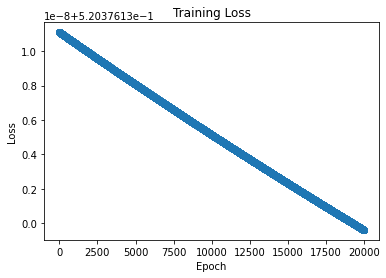

In [83]:
L = train(20000)